In [1]:
%matplotlib inline
%load_ext dotenv
%dotenv env.sh
import pandas as pd
import numpy as np
import plotnine as pn
import os
import os.path as osp
from cytokit import config as ck_config
from cytokit.function import data as ck_data
exp_variant = 'v01'

In [2]:
df = pd.read_csv('experiments.csv')
df['has_peptide'] = df['cond'].str.match(r'.*\-wp\-.*').map({True: 'w/ Peptide', False: 'No Peptide'})
df['cell_count'] = df['name'].str.extract(r'([\d.]+mT)', expand=False)
df['sta_conc'] = df['name'].str.extract(r'([\d.]+uMsta)', expand=False)
df['label'] = df.apply(lambda r: '{}-{}-r{:01d}'.format(r['cell_count'], r['sta_conc'], r['rep']), axis=1)
df['key'] = df.apply(lambda r: '{}-{}-{}'.format(r['has_peptide'], r['sta_conc'], r['cell_count']), axis=1)
df['rep'] = df['rep'].apply(lambda v: 'r{}'.format(v))
df['output_dir'] = df.apply(lambda r: osp.join(os.environ['EXP_GROUP_OUT_DIR'], r['name'], exp_variant), axis=1)

# Filter to experiments with data and load config
df = df[df.apply(lambda r: osp.exists(osp.join(r['output_dir'], 'cytometry', 'data.csv')), axis=1)]
df['config'] = df.apply(lambda r: ck_config.load(osp.join(r['output_dir'], 'config')), axis=1)
df.head()

,name,conf,dir,grid,n_ch,n_tiles,n_z,cond,rep,z_pitch,has_peptide,cell_count,sta_conc,label,key,output_dir,config
0,00.0mT-np-0uMsta-XY01-1,experiment.yaml,untreated-noTcells-2,XY01,4,33,8,00.0mT-np-0uMsta,r1,200,No Peptide,00.0mT,0uMsta,00.0mT-0uMsta-r1,No Peptide-0uMsta-00.0mT,/lab/data/spheroid/20190719-co-culture/output/...,"{'environment': {'path_formats': ""get_default_..."
1,00.0mT-np-0uMsta-XY02-2,experiment.yaml,untreated-noTcells-2,XY02,4,33,8,00.0mT-np-0uMsta,r2,200,No Peptide,00.0mT,0uMsta,00.0mT-0uMsta-r2,No Peptide-0uMsta-00.0mT,/lab/data/spheroid/20190719-co-culture/output/...,"{'environment': {'path_formats': ""get_default_..."
2,00.0mT-np-0uMsta-XY03-3,experiment.yaml,untreated-noTcells-2,XY03,4,33,7,00.0mT-np-0uMsta,r3,200,No Peptide,00.0mT,0uMsta,00.0mT-0uMsta-r3,No Peptide-0uMsta-00.0mT,/lab/data/spheroid/20190719-co-culture/output/...,"{'environment': {'path_formats': ""get_default_..."
3,02.5mT-np-0uMsta-XY01-1,experiment.yaml,025mioTcells-nopeptide,XY01,4,33,9,02.5mT-np-0uMsta,r1,200,No Peptide,02.5mT,0uMsta,02.5mT-0uMsta-r1,No Peptide-0uMsta-02.5mT,/lab/data/spheroid/20190719-co-culture/output/...,"{'environment': {'path_formats': ""get_default_..."
4,02.5mT-np-0uMsta-XY02-2,experiment.yaml,025mioTcells-nopeptide,XY02,4,33,8,02.5mT-np-0uMsta,r2,200,No Peptide,02.5mT,0uMsta,02.5mT-0uMsta-r2,No Peptide-0uMsta-02.5mT,/lab/data/spheroid/20190719-co-culture/output/...,"{'environment': {'path_formats': ""get_default_..."


### Cell Data 

In [3]:
dfa = pd.concat([
    ck_data.get_cytometry_data(r['output_dir'], r['config']).assign(**r[[
        'name', 'grid', 'cond', 'has_peptide', 'cell_count', 'sta_conc', 'label', 'rep', 'key'
    ]].add_prefix('exp:').to_dict())
    for i, r in df.iterrows()
])
dfa = dfa.rename(columns=lambda c: c.replace(':', '_'))
dfa.head()

,region_index,tile_index,tile_x,tile_y,rid,rx,ry,id,x,y,...,ni_SPHEROID_mean,exp_cell_count,exp_cond,exp_grid,exp_has_peptide,exp_key,exp_label,exp_name,exp_rep,exp_sta_conc
0,0,0,0,0,0,282.810559,498.397516,1,282.810559,498.397516,...,0.0,00.0mT,00.0mT-np-0uMsta,XY01,No Peptide,No Peptide-0uMsta-00.0mT,00.0mT-0uMsta-r1,00.0mT-np-0uMsta-XY01-1,r1,0uMsta
1,0,0,0,0,1,288.645202,479.516414,2,288.645202,479.516414,...,0.0,00.0mT,00.0mT-np-0uMsta,XY01,No Peptide,No Peptide-0uMsta-00.0mT,00.0mT-0uMsta-r1,00.0mT-np-0uMsta-XY01-1,r1,0uMsta
2,0,0,0,0,2,319.117791,473.000000,3,319.117791,473.000000,...,0.0,00.0mT,00.0mT-np-0uMsta,XY01,No Peptide,No Peptide-0uMsta-00.0mT,00.0mT-0uMsta-r1,00.0mT-np-0uMsta-XY01-1,r1,0uMsta
3,0,0,0,0,3,224.000000,453.000000,4,224.000000,453.000000,...,0.0,00.0mT,00.0mT-np-0uMsta,XY01,No Peptide,No Peptide-0uMsta-00.0mT,00.0mT-0uMsta-r1,00.0mT-np-0uMsta-XY01-1,r1,0uMsta
4,0,0,0,0,4,108.000000,453.000000,5,108.000000,453.000000,...,0.0,00.0mT,00.0mT-np-0uMsta,XY01,No Peptide,No Peptide-0uMsta-00.0mT,00.0mT-0uMsta-r1,00.0mT-np-0uMsta-XY01-1,r1,0uMsta


In [4]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 448931 entries, 0 to 481
Data columns (total 46 columns):
region_index        448931 non-null object
tile_index          448931 non-null object
tile_x              448931 non-null object
tile_y              448931 non-null object
rid                 448931 non-null int64
rx                  448931 non-null float64
ry                  448931 non-null float64
id                  448931 non-null object
x                   448931 non-null float64
y                   448931 non-null float64
z                   448931 non-null object
cm_circularity      448931 non-null float64
cm_diameter         448931 non-null float64
cm_diameter_vx      448931 non-null float64
cm_perimeter        448931 non-null float64
cm_size             448931 non-null float64
cm_size_vx          448931 non-null object
cm_solidity         448931 non-null float64
nm_circularity      448931 non-null float64
nm_diameter         448931 non-null float64
nm_diameter_vx      4

In [5]:
dfa['cb_on_border'].value_counts()

0    374995
1     73936
Name: cb_on_border, dtype: int64

In [6]:
def select_z_plane(g):
    z = g['z'].value_counts().idxmax()
    return g[g['z'] == z]

dfs = (
    dfa
    # Restrict to cells in a spheroid
    .pipe(lambda df: df[df['ci_SPHEROID_mean'] > 0])
    # Select z plane with most cells
    .groupby(['exp_name', 'tile_index'], group_keys=False).apply(select_z_plane)
)
assert (dfs.groupby(['exp_name', 'tile_index'])['z'].nunique() == 1).all()
dfs.groupby(['exp_name', 'tile_index'])['z'].max().unstack().fillna(0).astype(int)

tile_index,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
exp_name,,,,,,,,,,,,,,,,,,,,,
00.0mT-np-0uMsta-XY01-1,5,4,4,4,4,4,4,4,3,3,...,4,4,3,3,3,4,4,4,4,3
00.0mT-np-0uMsta-XY02-2,3,4,4,4,4,4,0,5,4,4,...,4,4,4,4,3,4,3,4,4,4
00.0mT-np-0uMsta-XY03-3,0,3,4,3,4,4,0,4,6,3,...,0,3,3,4,3,3,3,3,3,3
00.0mT-np-4uMsta-XY01-1,4,3,4,3,3,3,3,3,4,3,...,3,3,3,3,3,3,3,3,3,1
00.0mT-np-4uMsta-XY02-2,5,5,5,5,5,5,5,4,4,4,...,5,5,4,4,4,5,5,5,5,5
00.0mT-np-4uMsta-XY03-3,3,4,4,4,4,4,4,4,4,4,...,4,4,4,3,4,4,4,4,3,3
02.5mT-np-0uMsta-XY01-1,0,4,5,5,5,7,5,5,6,5,...,5,6,5,5,6,6,6,6,5,6
02.5mT-np-0uMsta-XY02-2,5,6,5,5,4,5,5,5,5,5,...,1,3,5,3,5,4,0,0,4,2
02.5mT-np-0uMsta-XY03-3,5,5,6,5,5,5,5,5,5,5,...,4,5,5,5,5,4,5,5,5,5


In [7]:
dfsct = dfs.groupby(['exp_name', 'exp_key', 'exp_has_peptide', 'exp_rep', 'exp_sta_conc']).size().rename('value').reset_index()
dfsct

,exp_name,exp_key,exp_has_peptide,exp_rep,exp_sta_conc,value
0,00.0mT-np-0uMsta-XY01-1,No Peptide-0uMsta-00.0mT,No Peptide,r1,0uMsta,1419
1,00.0mT-np-0uMsta-XY02-2,No Peptide-0uMsta-00.0mT,No Peptide,r2,0uMsta,1320
2,00.0mT-np-0uMsta-XY03-3,No Peptide-0uMsta-00.0mT,No Peptide,r3,0uMsta,950
3,00.0mT-np-4uMsta-XY01-1,No Peptide-4uMsta-00.0mT,No Peptide,r1,4uMsta,2398
4,00.0mT-np-4uMsta-XY02-2,No Peptide-4uMsta-00.0mT,No Peptide,r2,4uMsta,2016
5,00.0mT-np-4uMsta-XY03-3,No Peptide-4uMsta-00.0mT,No Peptide,r3,4uMsta,2384
6,02.5mT-np-0uMsta-XY01-1,No Peptide-0uMsta-02.5mT,No Peptide,r1,0uMsta,1763
7,02.5mT-np-0uMsta-XY02-2,No Peptide-0uMsta-02.5mT,No Peptide,r2,0uMsta,1646
8,02.5mT-np-0uMsta-XY03-3,No Peptide-0uMsta-02.5mT,No Peptide,r3,0uMsta,1087
9,02.5mT-wp-0uMsta-XY01-1,w/ Peptide-0uMsta-02.5mT,w/ Peptide,r1,0uMsta,1677


In [8]:
def plot_series(df):
    dfg = df.groupby(['exp_key', 'exp_has_peptide', 'exp_sta_conc'])['value'].mean().rename('value').reset_index()
    return (
        pn.ggplot(df, pn.aes(x='exp_key', y='value')) + 
        pn.geom_jitter(
            width=.1, height=0, random_state=0, 
            mapping=pn.aes(fill='exp_rep', color='exp_rep', shape='exp_has_peptide', size='exp_sta_conc')
        ) + 
        pn.geom_point(data=dfg, mapping=pn.aes(x='exp_key', y='value', shape='exp_has_peptide', size='exp_sta_conc'), color='black', fill='black') +
        pn.geom_line(data=dfg, mapping=pn.aes(x='exp_key', y='value', group=1)) +
        pn.theme_bw() + 
        pn.labs(x='Condition', color='Replicate', fill='Replicate', shape='Peptide', size='STA') + 
        pn.scale_size_discrete(range=(3, 5)) + 
        pn.theme(figure_size=(12, 4), axis_text_x=pn.element_text(rotation=45, hjust=1))
    )

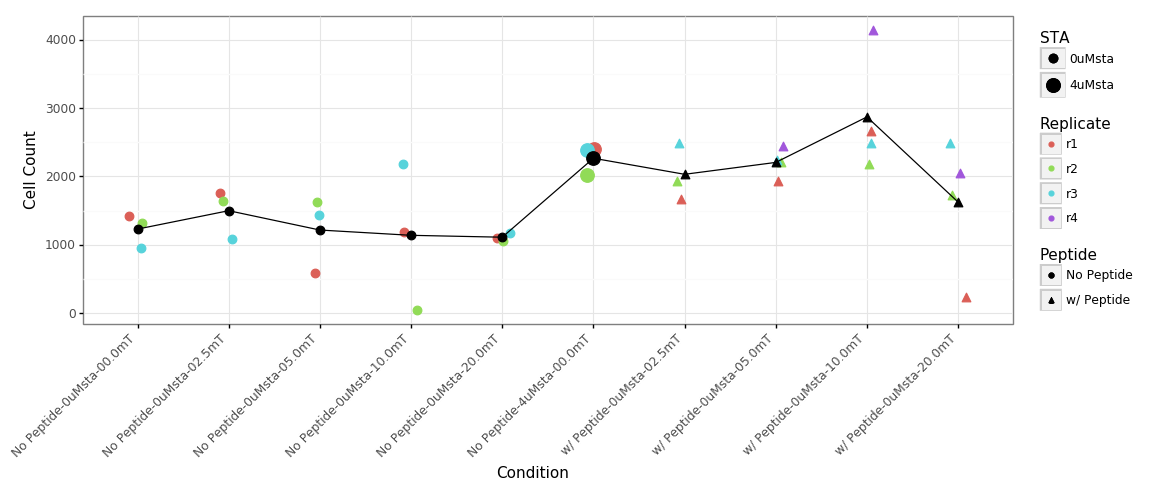

<ggplot: (-9223363299955640404)>

In [9]:
plot_series(dfsct) + pn.labs(y='Cell Count')

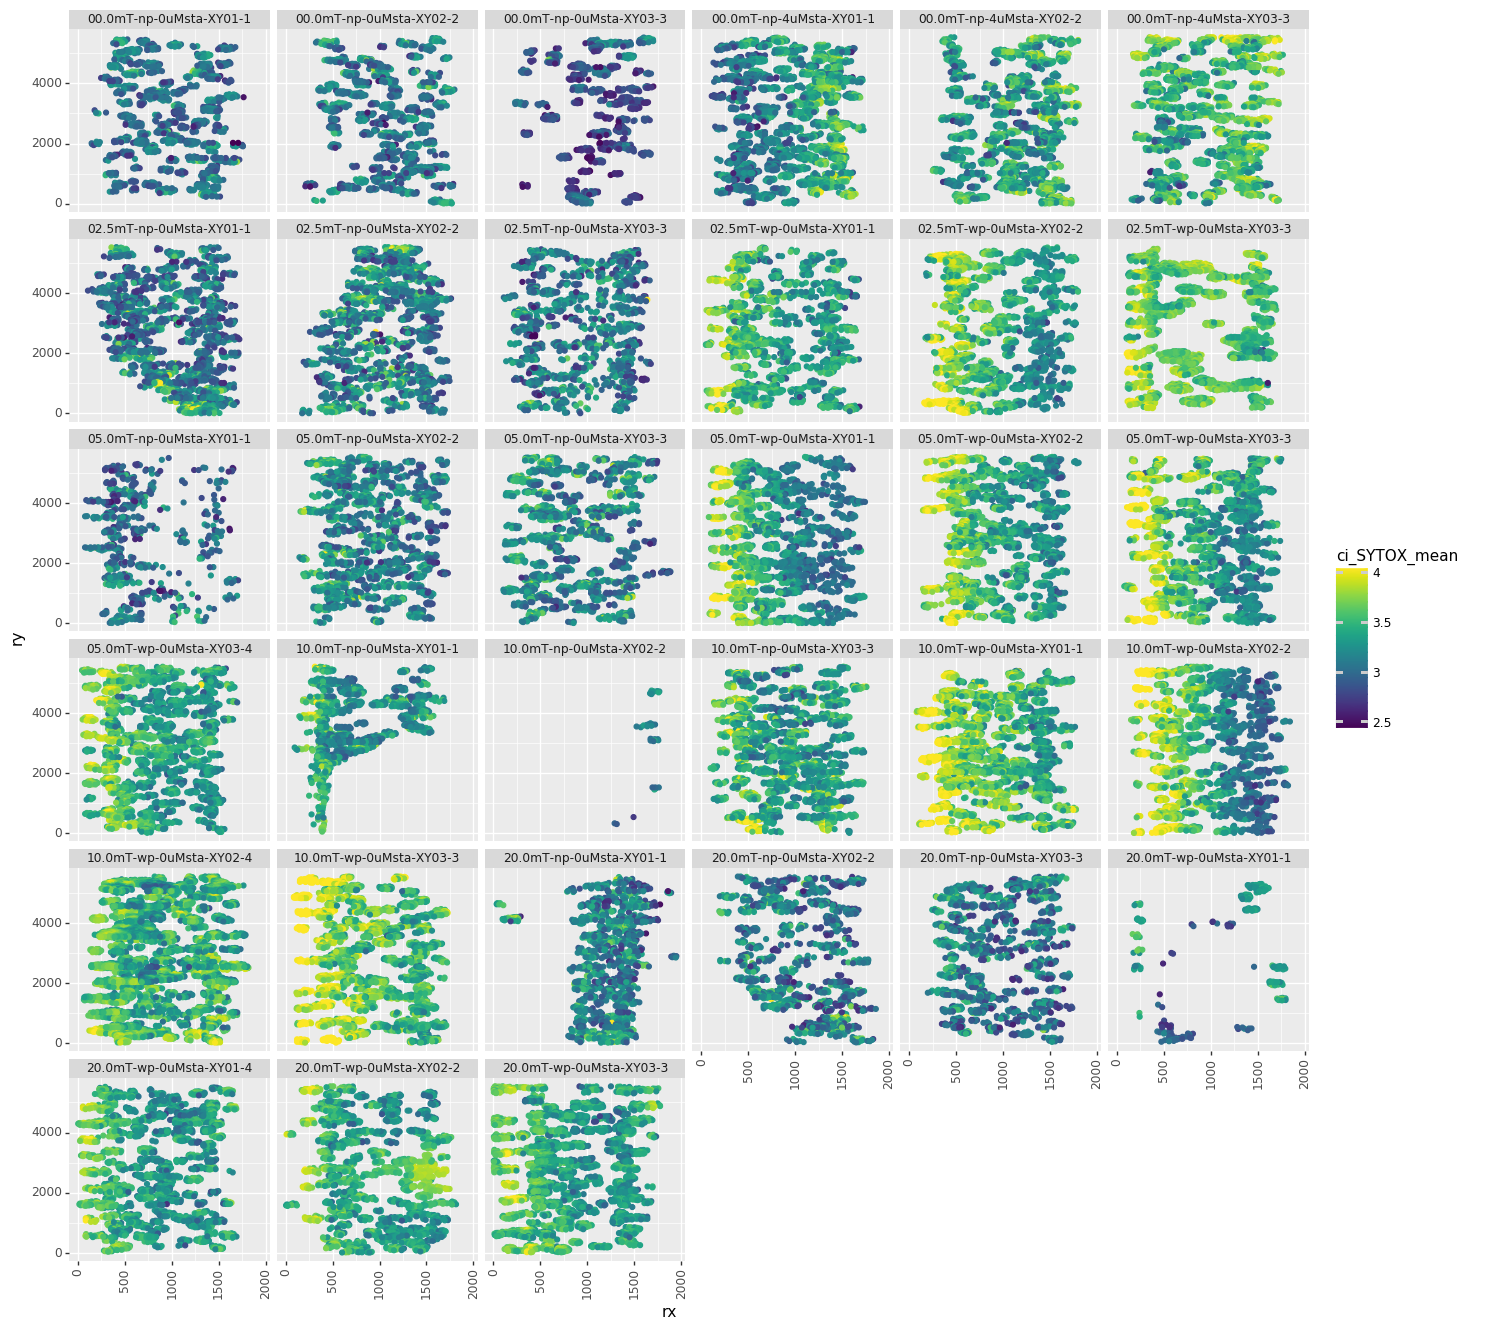

<ggplot: (-9223363299956001020)>

In [10]:
(
    pn.ggplot(
        dfs.assign(ci_SYTOX_mean=lambda df: df['ci_SYTOX_mean'].apply(np.log10).clip(0, 4)), 
        pn.aes(x='rx', y='ry', fill='ci_SYTOX_mean', color='ci_SYTOX_mean')
    ) + 
    pn.geom_point() + 
    pn.facet_wrap('~exp_name') + 
    pn.theme(axis_text_x=pn.element_text(rotation=90), figure_size=(16, 16))
)

In [11]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58268 entries, 227 to 258
Data columns (total 46 columns):
region_index        58268 non-null object
tile_index          58268 non-null object
tile_x              58268 non-null object
tile_y              58268 non-null object
rid                 58268 non-null int64
rx                  58268 non-null float64
ry                  58268 non-null float64
id                  58268 non-null object
x                   58268 non-null float64
y                   58268 non-null float64
z                   58268 non-null object
cm_circularity      58268 non-null float64
cm_diameter         58268 non-null float64
cm_diameter_vx      58268 non-null float64
cm_perimeter        58268 non-null float64
cm_size             58268 non-null float64
cm_size_vx          58268 non-null object
cm_solidity         58268 non-null float64
nm_circularity      58268 non-null float64
nm_diameter         58268 non-null float64
nm_diameter_vx      58268 non-null float

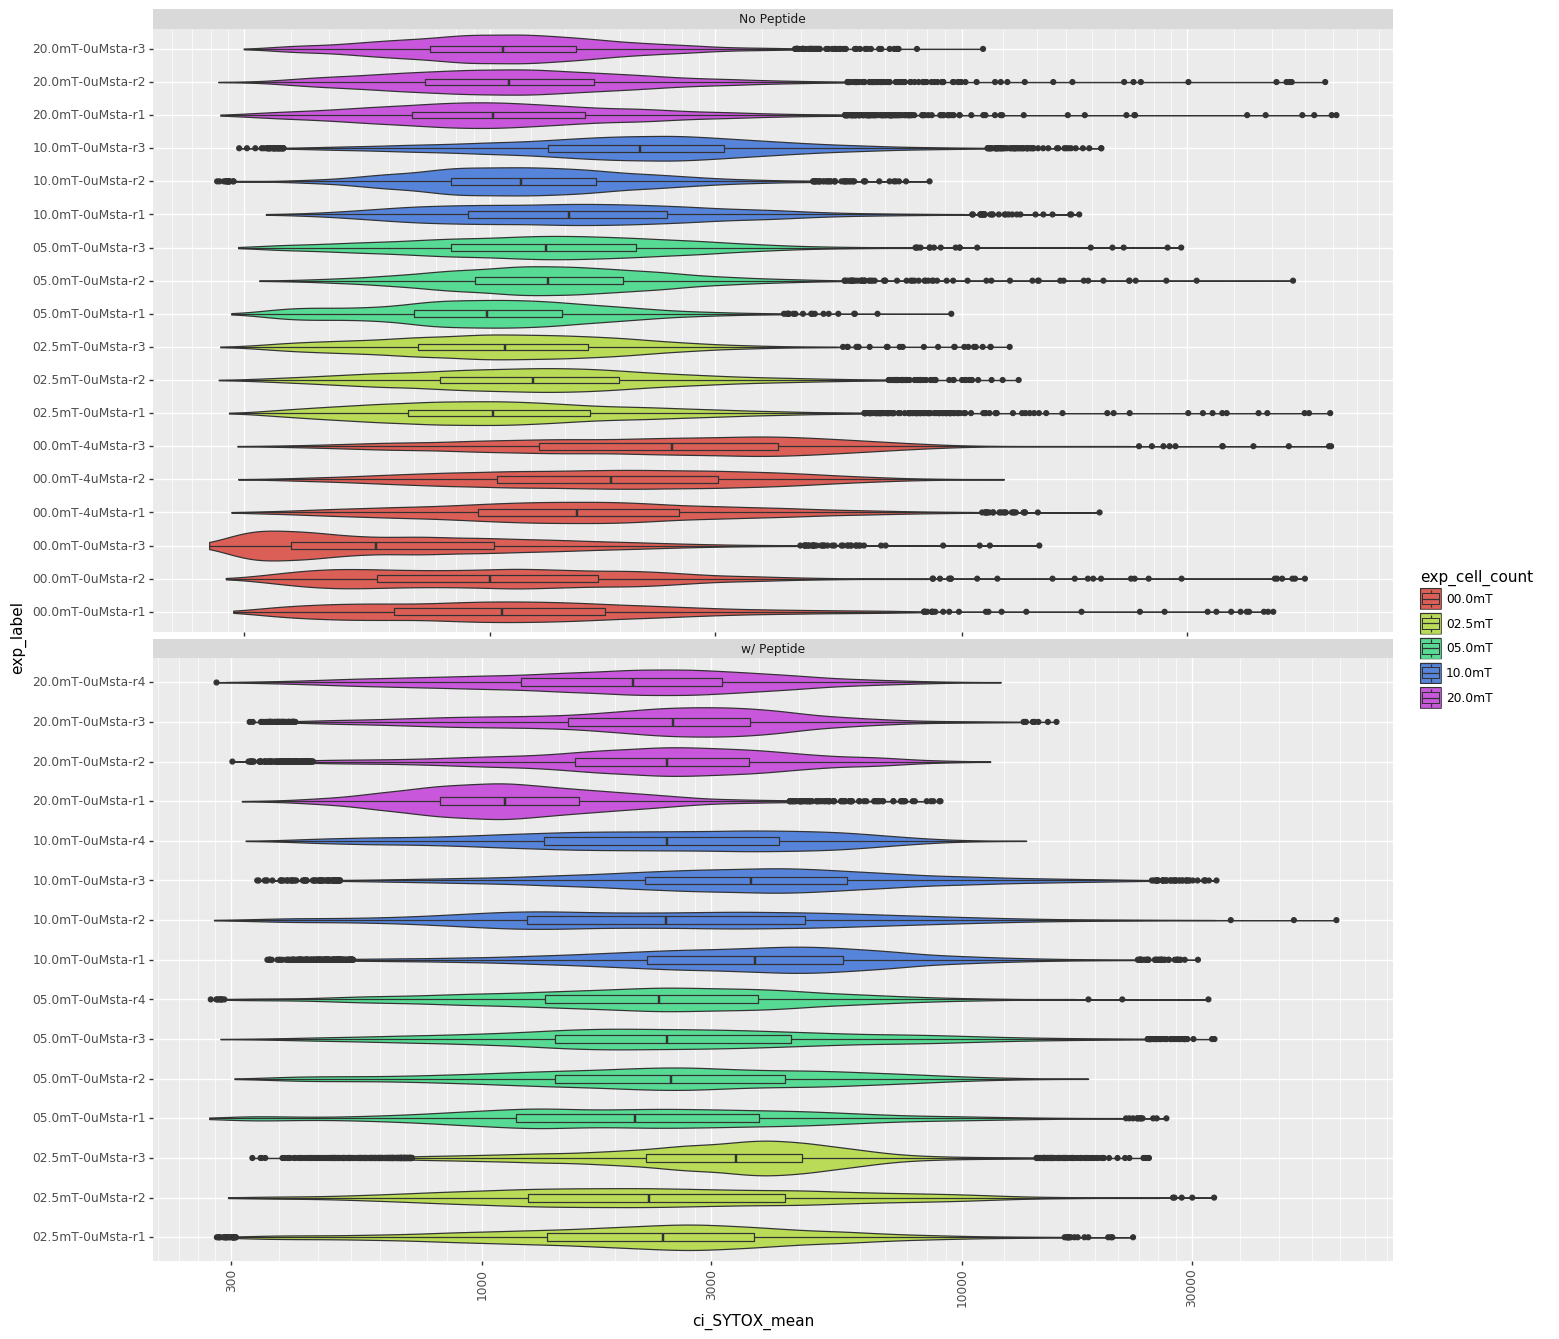

<ggplot: (-9223363299961033675)>

In [12]:
(
    pn.ggplot(
        dfa,
        pn.aes(x='exp_label', y='ci_SYTOX_mean', fill='exp_cell_count')
    ) + 
    pn.geom_violin() + 
    pn.geom_boxplot(width=.2) + 
    pn.coord_flip() + 
    pn.scale_y_log10() +
    pn.facet_wrap('~ exp_has_peptide', ncol=1, nrow=2, scales='free') + 
    pn.theme(axis_text_x=pn.element_text(rotation=90), figure_size=(16, 16))
)

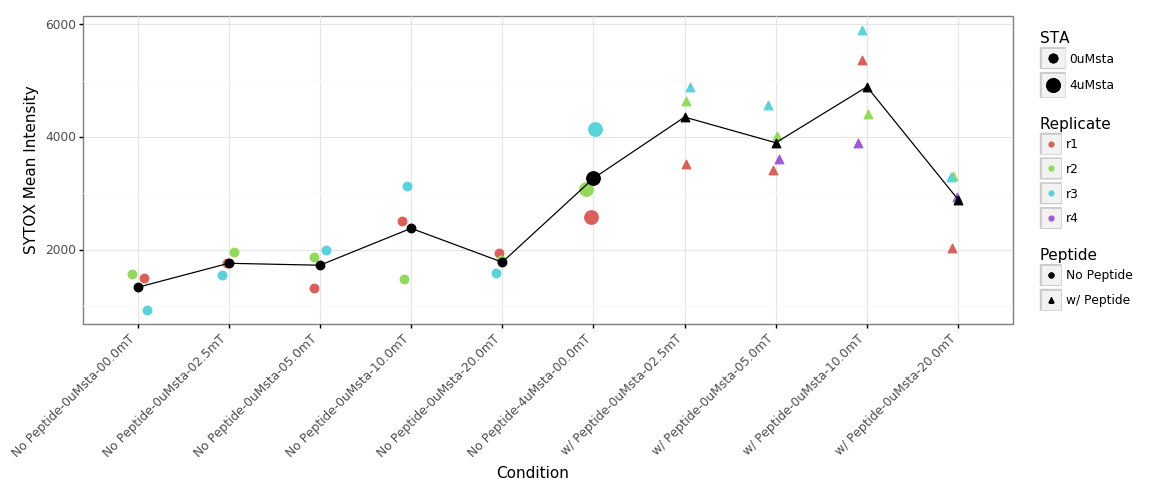

<ggplot: (8736890638726)>

In [13]:
dfsval = dfs.groupby(['exp_name', 'exp_key', 'exp_has_peptide', 'exp_rep', 'exp_sta_conc'])['ci_SYTOX_mean'].mean().rename('value').reset_index()
plot_series(dfsval) + pn.labs(y='SYTOX Mean Intensity')

### Spheroid Data

In [14]:
dfsh = pd.concat([
    pd.read_csv(osp.join(r['output_dir'], 'cytometry', 'data.spheroid.csv')).assign(**r[[
        'name', 'grid', 'cond', 'has_peptide', 'cell_count', 'sta_conc', 'label', 'rep', 'key'
    ]].add_prefix('exp:').to_dict())
    for i, r in df.iterrows()
])
dfsh = dfsh.rename(columns=lambda c: c.replace(':', '_'))
dfsh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4183 entries, 0 to 140
Data columns (total 29 columns):
id                 4183 non-null int64
x                  4183 non-null float64
y                  4183 non-null float64
z                  4183 non-null int64
cm_circularity     4183 non-null float64
cm_diameter        4183 non-null float64
cm_perimeter       4183 non-null float64
cm_size            4183 non-null int64
cm_solidity        4183 non-null float64
nm_circularity     4183 non-null float64
nm_diameter        4183 non-null float64
nm_perimeter       4183 non-null float64
nm_size            4183 non-null int64
nm_solidity        4183 non-null float64
cb_on_border       4183 non-null int64
nb_on_border       4183 non-null int64
ci_SYTOX_mean      4183 non-null float64
ci_ICYTE_mean      4183 non-null float64
ci_HOECHST_mean    4183 non-null float64
ci_BF_mean         4183 non-null float64
exp_cell_count     4183 non-null object
exp_cond           4183 non-null object
exp_gr

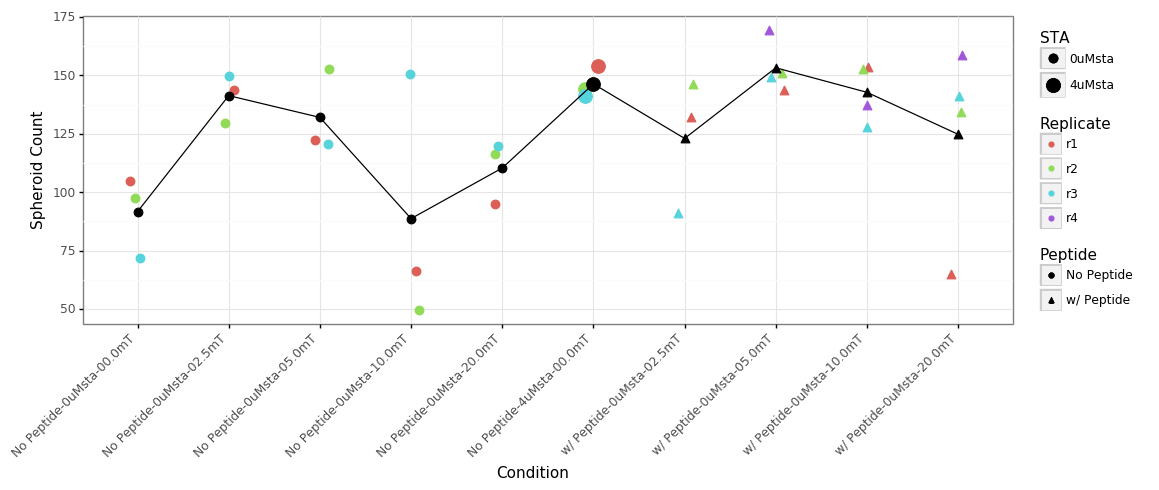

<ggplot: (-9223363299956102421)>

In [15]:
dfshct = dfsh.groupby(['exp_name', 'exp_key', 'exp_has_peptide', 'exp_rep', 'exp_sta_conc']).size().rename('value').reset_index()
plot_series(dfshct) + pn.labs(y='Spheroid Count')

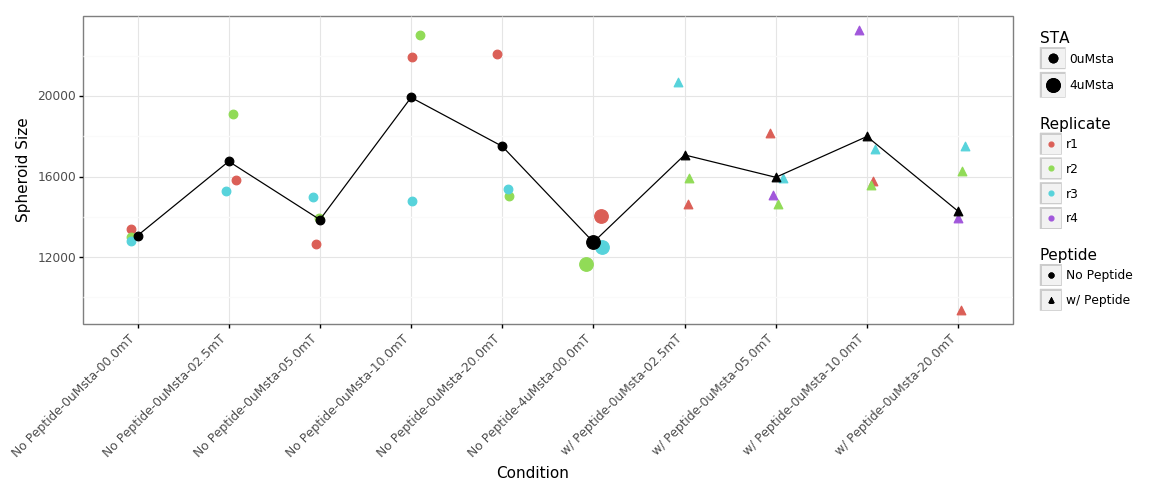

<ggplot: (-9223363299956166368)>

In [16]:
dfshsz = dfsh.groupby(['exp_name', 'exp_key', 'exp_has_peptide', 'exp_rep', 'exp_sta_conc'])['cm_size'].mean().rename('value').reset_index()
plot_series(dfshsz) + pn.labs(y='Spheroid Size')

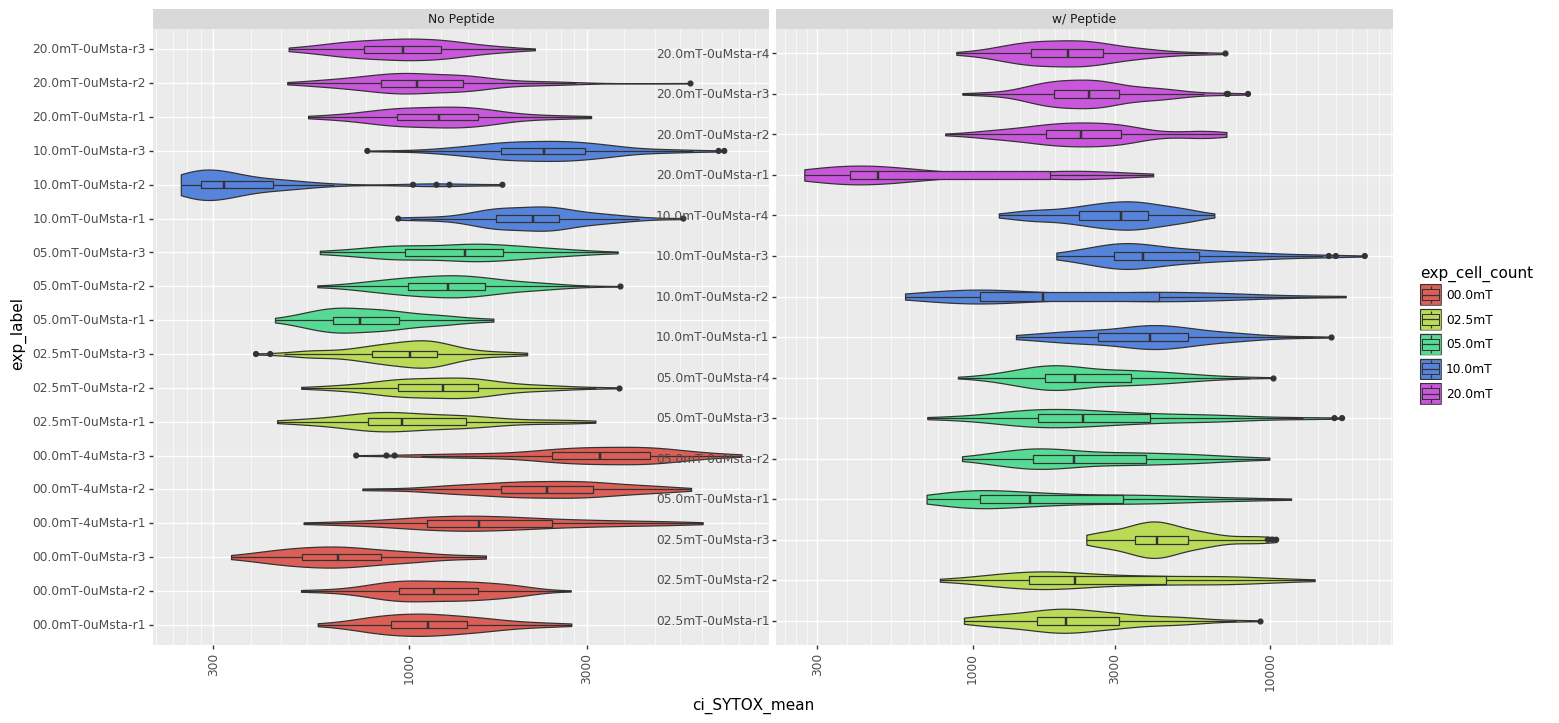

<ggplot: (-9223363299964164485)>

In [17]:
(
    pn.ggplot(
        dfsh,
        pn.aes(x='exp_label', y='ci_SYTOX_mean', fill='exp_cell_count')
    ) + 
    pn.geom_violin() + 
    pn.geom_boxplot(width=.2) + 
    pn.coord_flip() + 
    pn.scale_y_log10() +
    pn.facet_wrap('~ exp_has_peptide', ncol=2, nrow=1, scales='free') + 
    pn.theme(axis_text_x=pn.element_text(rotation=90), figure_size=(16, 8))
)

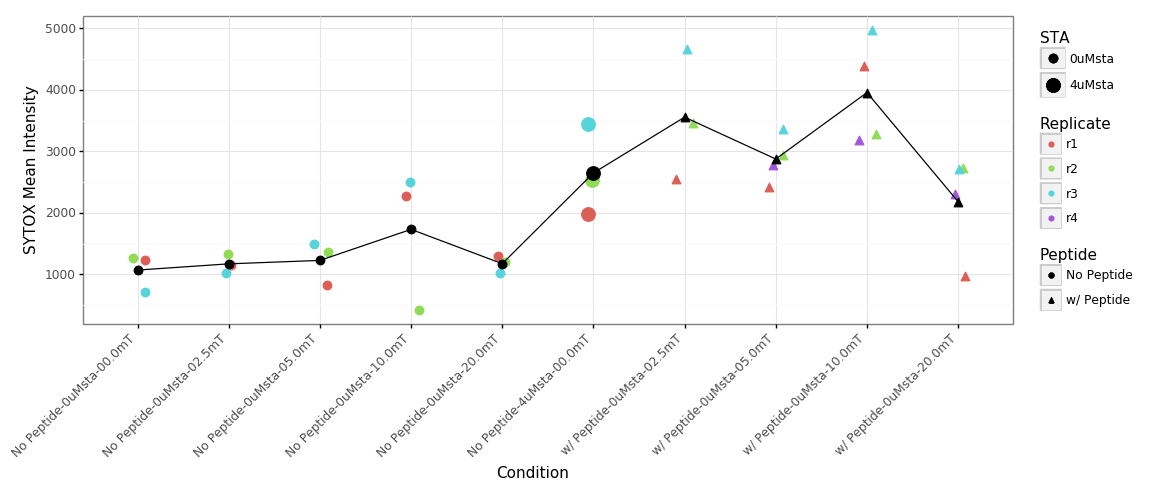

<ggplot: (-9223363299956099745)>

In [18]:
dfshval = dfsh.groupby(['exp_name', 'exp_key', 'exp_has_peptide', 'exp_rep', 'exp_sta_conc'])['ci_SYTOX_mean'].mean().rename('value').reset_index()
plot_series(dfshval) + pn.labs(y='SYTOX Mean Intensity')

In [19]:
dfsh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4183 entries, 0 to 140
Data columns (total 29 columns):
id                 4183 non-null int64
x                  4183 non-null float64
y                  4183 non-null float64
z                  4183 non-null int64
cm_circularity     4183 non-null float64
cm_diameter        4183 non-null float64
cm_perimeter       4183 non-null float64
cm_size            4183 non-null int64
cm_solidity        4183 non-null float64
nm_circularity     4183 non-null float64
nm_diameter        4183 non-null float64
nm_perimeter       4183 non-null float64
nm_size            4183 non-null int64
nm_solidity        4183 non-null float64
cb_on_border       4183 non-null int64
nb_on_border       4183 non-null int64
ci_SYTOX_mean      4183 non-null float64
ci_ICYTE_mean      4183 non-null float64
ci_HOECHST_mean    4183 non-null float64
ci_BF_mean         4183 non-null float64
exp_cell_count     4183 non-null object
exp_cond           4183 non-null object
exp_gr

In [20]:
dfsh['exp_name'].unique()

array(['00.0mT-np-0uMsta-XY01-1', '00.0mT-np-0uMsta-XY02-2',
       '00.0mT-np-0uMsta-XY03-3', '02.5mT-np-0uMsta-XY01-1',
       '02.5mT-np-0uMsta-XY02-2', '02.5mT-np-0uMsta-XY03-3',
       '05.0mT-np-0uMsta-XY01-1', '05.0mT-np-0uMsta-XY02-2',
       '05.0mT-np-0uMsta-XY03-3', '10.0mT-np-0uMsta-XY01-1',
       '10.0mT-np-0uMsta-XY02-2', '10.0mT-np-0uMsta-XY03-3',
       '20.0mT-np-0uMsta-XY01-1', '20.0mT-np-0uMsta-XY02-2',
       '20.0mT-np-0uMsta-XY03-3', '02.5mT-wp-0uMsta-XY01-1',
       '02.5mT-wp-0uMsta-XY02-2', '02.5mT-wp-0uMsta-XY03-3',
       '05.0mT-wp-0uMsta-XY01-1', '05.0mT-wp-0uMsta-XY02-2',
       '05.0mT-wp-0uMsta-XY03-3', '10.0mT-wp-0uMsta-XY01-1',
       '10.0mT-wp-0uMsta-XY02-2', '10.0mT-wp-0uMsta-XY03-3',
       '20.0mT-wp-0uMsta-XY01-1', '20.0mT-wp-0uMsta-XY02-2',
       '20.0mT-wp-0uMsta-XY03-3', '20.0mT-wp-0uMsta-XY01-4',
       '10.0mT-wp-0uMsta-XY02-4', '05.0mT-wp-0uMsta-XY03-4',
       '00.0mT-np-4uMsta-XY01-1', '00.0mT-np-4uMsta-XY02-2',
       '00.0mT-np-4uMsta

In [21]:
bad_exps = [
    '20.0mT-wp-0uMsta-XY01-1',
    '10.0mT-np-0uMsta-XY02-2',
    '20.0mT-np-0uMsta-XY01-1',
    '10.0mT-np-0uMsta-XY01-1',
    '05.0mT-np-0uMsta-XY01-1'
]

In [23]:
(
    dfsh
    .pipe(lambda df: df[~df['exp_name'].isin(bad_exps)])
    .assign(pos=lambda df: pd.cut(df['x'], bins=10))
    .groupby(['exp_name','exp_has_peptide', 'exp_sta_conc', 'pos'])['ci_SYTOX_mean'].mean().rename('value').reset_index()
    .groupby(['exp_name','exp_has_peptide', 'exp_sta_conc'])
    .apply(lambda g: g.set_index('pos')['value'].rolling(window=3, min_periods=1, center=True).mean())
    .rename('value').reset_index()
).head()

,exp_name,exp_has_peptide,exp_sta_conc,pos,value
0,00.0mT-np-0uMsta-XY01-1,No Peptide,0uMsta,"(47.69, 228.033]",1263.754421
1,00.0mT-np-0uMsta-XY01-1,No Peptide,0uMsta,"(228.033, 406.59]",1303.534946
2,00.0mT-np-0uMsta-XY01-1,No Peptide,0uMsta,"(406.59, 585.148]",1213.111700
3,00.0mT-np-0uMsta-XY01-1,No Peptide,0uMsta,"(585.148, 763.705]",1207.647892
4,00.0mT-np-0uMsta-XY01-1,No Peptide,0uMsta,"(763.705, 942.263]",1073.431879


In [24]:
dfsh['x'].describe()

count    4183.000000
mean      952.222854
std       424.640651
min        49.475562
25%       578.004476
50%       959.787329
75%      1342.516638
max      1909.030315
Name: x, dtype: float64

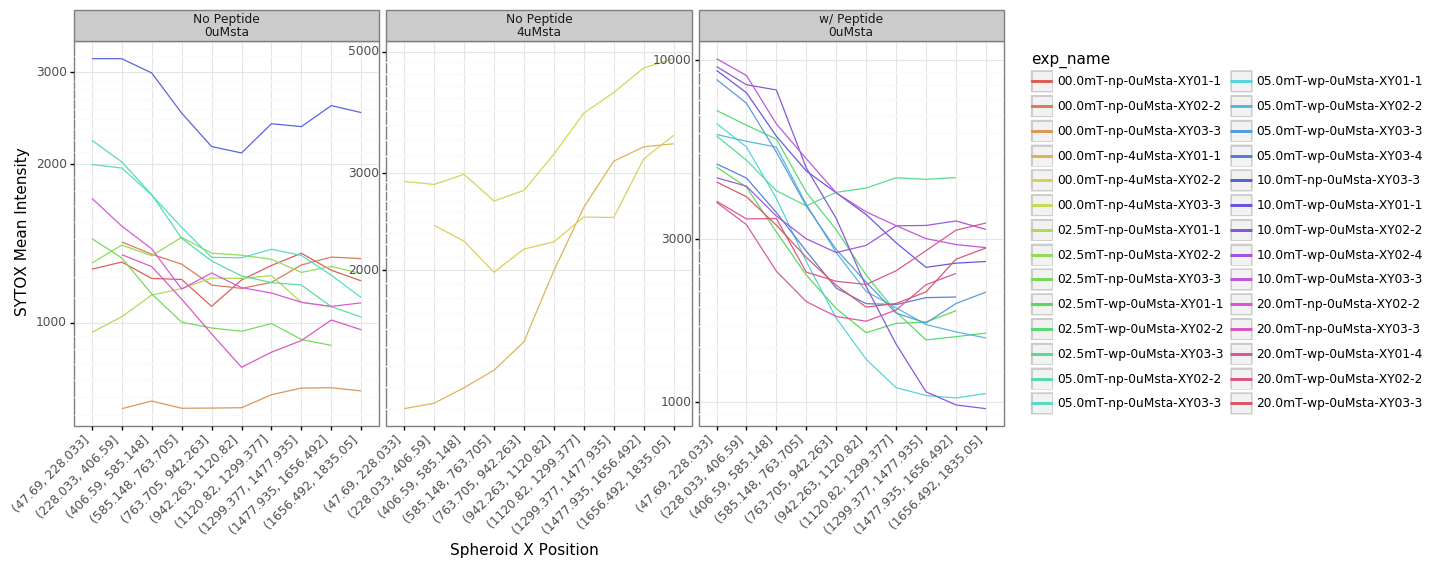

<ggplot: (-9223363299956208822)>

In [27]:
dfp = (
    dfsh
    .pipe(lambda df: df[~df['exp_name'].isin(bad_exps)])
    .assign(pos=lambda df: pd.cut(df['x'], bins=10))
    .groupby(['exp_name','exp_has_peptide', 'exp_sta_conc', 'pos'])['ci_SYTOX_mean'].mean().rename('value').reset_index()
    .groupby(['exp_name','exp_has_peptide', 'exp_sta_conc'])
    .apply(lambda g: g.set_index('pos')['value'].rolling(window=3, min_periods=1, center=True).mean())
    .rename('value').reset_index()
)
(
    pn.ggplot(
        dfp,
        pn.aes(x='pos', y='value', color='exp_name', group='exp_name')
    ) + 
    pn.geom_line() +
    pn.facet_wrap('~ exp_has_peptide + exp_sta_conc', scales='free_y') + 
    pn.scale_y_log10() + 
    pn.labs(x='Spheroid X Position', y='SYTOX Mean Intensity') + 
    pn.theme_bw() + 
    pn.theme(figure_size=(12, 5), axis_text_x=pn.element_text(rotation=45, hjust=1))
)